Preprocessing Workflow:

This notebook is being used to hanlde the preprocessing portion of the capstone. The intent is to help me work through to a final construct for a presentation and deliverable for the final capstone at Thinkful. It is not a submission. 


*premise:*

The capstone is from the [Kaggle TalkingData](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/overview) dataset. The product is a demographic identifier. Using information retreived from an electronic device, such as a cell phone; tablet; netbook; etc. - the tool reviews the applications users have installed, the type of applications, etc. to determine the age and gender of the users. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#A summary of missing variables represented as a percentage of the total missing content. 
def null_summary(df, print_log=False, sort='ascending'):
    s = df.isnull().sum()*100/df.isnull().count()
    
    if sort.lower() == 'ascending':
        s = s.sort_values(ascending=True)
    elif sort.lower() == 'descending':
        s = s.sort_values(ascending=False)  
    if print_log: 
        print('Percentage of null values: \n', s)
  
    return pd.Series(s)

The data available on Kaggle is split into several different CSV files. Extract the files and review the data. What is the resulting dataframe going to look like? What can be changed, altered, updated, used, to predict the target variables?

What are the target variables? etc.

# APP_EVENTS

In [3]:
app_events = pd.read_csv('./data/app_events.csv.zip', compression='zip')

In [4]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [5]:
#Can an app be active if it is not installed?
app_events.nunique()

event_id        1488096
app_id            19237
is_installed          1
is_active             2
dtype: int64

In [6]:
null_summary(app_events)

event_id        0.0
app_id          0.0
is_installed    0.0
is_active       0.0
dtype: float64

## Questions and observations

It looks like is_installed is an unnecessary column. I will not want to use this column in my analysis or usage are there are no applications that do not have an application. The assumption is that I'm going to encode categorical variables so that they're ready for use with machine learning; so situations where an app is not installed will be labeled with a 1 or 0 on the column interval. This justifies the loss of the is_installed column. 

is_active is a binary type. 

Do people who have a certain number of active applications fall within a certain age group?
Are people who identify as male or female more likely to have more application installed? 

# Events

In [7]:
events =  pd.read_csv('./data/events.csv.zip', compression='zip')

In [8]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [9]:
null_summary(events)

event_id     0.0
device_id    0.0
timestamp    0.0
longitude    0.0
latitude     0.0
dtype: float64

In [10]:
events.nunique()

event_id     3252950
device_id      60865
timestamp     588125
longitude       3588
latitude        3086
dtype: int64

In [11]:
events.count()

event_id     3252950
device_id    3252950
timestamp    3252950
longitude    3252950
latitude     3252950
dtype: int64

In [12]:
events['coordinates'] = [(x, y) for x, y in zip(events.latitude, events.longitude)]

In [13]:
events['coordinates'].value_counts()[events['coordinates'].value_counts() < 10]

(30.28, 112.29)    9
(36.71, 121.38)    9
(31.3, 120.61)     9
(23.19, 113.22)    9
(32.01, 119.08)    9
                  ..
(30.28, 106.5)     1
(34.55, 115.39)    1
(32.18, 119.35)    1
(22.61, 113.85)    1
(25.81, 114.82)    1
Name: coordinates, Length: 41282, dtype: int64

In [14]:
events[(events.latitude > 0) & (events.longitude > 0)].sort_values(by=['coordinates'])

,event_id,device_id,timestamp,longitude,latitude,coordinates
805906,805907,5404477794074719040,2016-05-06 00:12:36,0.23,0.01,"(0.01, 0.23)"
2868208,2868209,5404477794074719040,2016-05-06 00:13:36,0.23,0.01,"(0.01, 0.23)"
805905,805906,5404477794074719040,2016-05-06 00:12:06,0.23,0.01,"(0.01, 0.23)"
3041067,3041068,5404477794074719040,2016-05-06 00:13:22,0.23,0.01,"(0.01, 0.23)"
2028688,2028689,-1471692881227537768,2016-05-07 15:57:44,0.44,0.01,"(0.01, 0.44)"
...,...,...,...,...,...,...
2912133,2912134,-8587046306349220863,2016-05-06 14:08:17,124.71,52.33,"(52.33, 124.71)"
2266877,2266878,-8587046306349220863,2016-05-06 14:21:29,124.71,52.33,"(52.33, 124.71)"
1011467,1011468,7741178197893917209,2016-05-07 11:54:01,30.21,59.94,"(59.94, 30.21)"
251872,251873,7741178197893917209,2016-05-07 12:33:55,30.21,59.94,"(59.94, 30.21)"


Does the location and time of day have anything to do with the users demographics?

Are certain users more likely to access the data in specific locations? How many users are 'hanging out' together? Perhaps they are all in the same demographic and are using the same apps. 

Or, depending on the app, they could be doing family things - perhaps there's a shared calendar involved that I will find is used at the same location by various genders and ages. They could be colleagues. I have to predict the ages and the gender. 

I'll want to look at the time of day based on the demographic and the location. For convenience, it may be worth having an extra cell with the location information stored as a tuple (I may want to map it).

With over 900,000 datapoints at locations 0,0 and 1,1; I question whether or not it would be better to determine the user's demographic based on whether or not the user is GPS sharing. I will consider this as I move through and conduct my EDA. Because I have a 0.0 and a 1.1 and do not know what EITHER of those means - but some of these coordinates are in the ocean; so they could be on a boat and I've got a lot of them. 

One consideration is to do cluster analysis using an unsupervised learning method and a dissimilarity matrix to assign a categorical location on these coordinates. I may want to run a silhuoette score on this to determine the best number of clusters to use for these coordinates. I can identify categories after placing them on a map.  

# gender_train

In [15]:
gender_train = pd.read_csv('./data/gender_age_train.csv.zip', compression='zip')

In [16]:
gender_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [17]:
gender_train.count()

device_id    74645
gender       74645
age          74645
group        74645
dtype: int64

In [18]:
gender_train.group.value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

These are my training variables. I want to concatenate these to the dataframe originally, so that I can perform the EDA; I'll split it back out later. 

What will a cluster analysis reveal about these groups?

# gender_test

In [19]:
gender_test = pd.read_csv('./data/gender_age_test.csv.zip', compression='zip')

In [20]:
gender_test.device_id.count() + gender_train.device_id.count()

186716

In [21]:
#These devices are not in the training set, good! 
gender_test[gender_test.device_id.isin(gender_train.device_id)]

,device_id


In [22]:
events.device_id[events.device_id.isin(gender_test.device_id)].count()

1944822

In [23]:
#verify that this isn't in there. Oh. It is. 
events.device_id[~events.device_id.isin(gender_test.device_id)].count()

1308128

This data that is associated with the test devices will need to be removed from the set.

# label_categories 

In [24]:
label_categories = pd.read_csv('./data/label_categories.csv.zip', compression='zip')
#Afte reviewing the data, go ahead and fill the missing categories with the undefined label. 
label_categories.category.fillna('Undefined', inplace=True)

In [25]:
label_categories.count()

label_id    930
category    930
dtype: int64

In [26]:
label_categories.nunique()

label_id    930
category    836
dtype: int64

In [27]:
#Number of value counts for all the categories. There are a lot of unique values. 
set(label_categories.category.value_counts())

{1, 2, 3, 26}

In [28]:
label_categories[label_categories.category == 'Undefined'].count()

label_id    3
category    3
dtype: int64

# App_labels

In [29]:
app_labels = pd.read_csv('./data/app_labels.csv.zip', compression='zip')

In [30]:
app_labels.nunique()

app_id      113211
label_id       507
dtype: int64

In [31]:
app_labels.label_id.value_counts().nlargest(10)

548    56902
405    53936
794    49320
795    48707
704    45697
714    19083
713    11840
854     9955
710     9027
711     8831
Name: label_id, dtype: int64

In [32]:
null_summary(app_labels)

app_id      0.0
label_id    0.0
dtype: float64

I have more categories than I do 'in use' label ids.

# Phone

In [33]:
phone = pd.read_csv('./data/phone_brand_device_model.csv.zip', compression='zip')
phone.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [34]:
null_summary(phone)

device_id       0.0
phone_brand     0.0
device_model    0.0
dtype: float64

In [35]:
phone.nunique()

device_id       186716
phone_brand        131
device_model      1599
dtype: int64

In [36]:
phone.groupby(by='phone_brand').nunique().nlargest(10, columns='device_id').sort_values(by='device_model', ascending=True)

,device_id,device_model
phone_brand,,
魅族,11817,16
小米,43109,26
OPPO,14239,65
HTC,2675,66
金立,2763,67
vivo,14342,80
酷派,8382,140
华为,32466,145
三星,34191,163


With over 100 brands and over 1,000 models, it is unlikely that I'll be able to conduct a visual analysis grouped by model or brand alone. With that said, it is unnecessary to convert the data to "english" at this point. The patterns are verily recognizable. 

I suspect that another cluster analysis against these features could also provide some insights into these demographics. Do I cluster on demographic and phones alone or do I cluster against the entire model? 

How about I look at the demographic (group) against the most popular brand by model? 


*notice:*

I did look into getting these phone_brands and models translated. I ran into the following problems:
1. The googletrans extension that was available on python ceased operation. There's a functional issue between the API and the authorization mechanism 
2. Importing a text or xlsx file into the documents portion of the google translate module return nil results.
3. Using GoogleTranslate with GoogleSheets returned what looked like ingredients of a shopping list; not phone brand names. 
4. Using the translate feature on Excel provided no translations. In fact, Excel produces unrecognizable characters, even after experimenting with various encodings.
5. A single copy paste of the characters into GoogleTranslate returns what looks like would be [reasonable results](https://translate.google.com/?sl=zh-CN&tl=es&text=%E8%81%94%E6%83%B3&op=translate). Translating each of these brands by hands is a bit much to ask; especially considering that they have a very small possibility of being put to use.  
6. While Kaggle does have translations on a few of the models, I cannot see the point in constructing a [dictionary](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.translate.html) without a full translation available. 

In [58]:
#create a separate variable to hold the merge data.
talkdata = events.copy()

In [59]:
talkdata['app_id'] = app_events.app_id
talkdata['is_active'] = app_events.is_active

In [60]:
#Combine phone with talkdata with the phone on device_id. The goal is to retain all event_ids; which are the uniquest thing. 
training_data = pd.merge(talkdata, phone.drop_duplicates(), on='device_id', how='left', indicator='phone_merge')

In [61]:
#Merge the app_labels based on label_id. Keep all events. 
training_data = pd.merge(training_data, app_labels, right_on='app_id', left_on='app_id', how='left', indicator='app_merge')

In [62]:
#Merge the categories on label_id. Keep all events.
training_data = pd.merge(training_data, label_categories, right_on='label_id', left_on='label_id', how='left', indicator='cat_merge')

In [63]:
#Merge the training data on device_id. Keep all training devices.
training_data = pd.merge(training_data, gender_train, right_on='device_id', left_on='device_id', how='right', indicator='train_merge')

In [64]:
training_data.nunique()

event_id        1215595
device_id         74645
timestamp        497663
longitude          2914
latitude           2707
coordinates       32921
app_id            12005
is_active             2
phone_brand          89
device_model        926
phone_merge           1
label_id            475
app_merge             1
category            441
cat_merge             1
gender                2
age                  85
group                12
train_merge           2
dtype: int64

In [65]:
#no missing records. The device_ids are my training target variable. There should be no more or less of them. 
print(f'Missing {gender_train.device_id.count() - training_data.device_id.count()} records')

Missing -7808973 records


In [66]:
merge_cols = training_data.columns[training_data.columns.str.contains('_merge')]
merge_cols

Index(['phone_merge', 'app_merge', 'cat_merge', 'train_merge'], dtype='object')

In [67]:
training_data.phone_merge.value_counts()

both          7832282
right_only          0
left_only           0
Name: phone_merge, dtype: int64

In [68]:
training_data.app_merge.value_counts()

both          7832282
right_only          0
left_only           0
Name: app_merge, dtype: int64

In [69]:
training_data.cat_merge.value_counts()

both          7832282
right_only          0
left_only           0
Name: cat_merge, dtype: int64

In [70]:
training_data.train_merge.value_counts()

both          7832282
right_only      51336
left_only           0
Name: train_merge, dtype: int64

In [71]:
#Looking at duplicate event_ids.
training_data[training_data.event_id.isin(training_data.pivot_table(index=['event_id'], aggfunc='size'))].nunique().sort_values()

train_merge      1
cat_merge        1
phone_merge      1
app_merge        1
gender           2
is_active        2
group            6
phone_brand      7
longitude        9
latitude         9
coordinates      9
age             10
device_model    10
device_id       10
app_id          11
timestamp       11
event_id        11
category        40
label_id        44
dtype: int64

In [72]:
#I cannot predict the target variables that don't have any features associated with them.
null_summary(training_data)

train_merge     0.000000
device_id       0.000000
age             0.000000
gender          0.000000
group           0.000000
cat_merge       0.651173
category        0.651173
app_merge       0.651173
label_id        0.651173
phone_merge     0.651173
event_id        0.651173
is_active       0.651173
app_id          0.651173
coordinates     0.651173
latitude        0.651173
longitude       0.651173
timestamp       0.651173
phone_brand     0.651173
device_model    0.651173
dtype: float64

In [73]:
training_data[training_data.event_id.isna()].count()

event_id            0
device_id       51336
timestamp           0
longitude           0
latitude            0
coordinates         0
app_id              0
is_active           0
phone_brand         0
device_model        0
phone_merge         0
label_id            0
app_merge           0
category            0
cat_merge           0
gender          51336
age             51336
group           51336
train_merge     51336
dtype: int64

In [74]:
#I can go ahead and drop the nulls.
training_data.dropna(inplace=True)

In [75]:
#All clean. I'm good on my training_data sets.
null_summary(training_data)

event_id        0.0
age             0.0
gender          0.0
cat_merge       0.0
category        0.0
app_merge       0.0
label_id        0.0
phone_merge     0.0
group           0.0
device_model    0.0
is_active       0.0
app_id          0.0
coordinates     0.0
latitude        0.0
longitude       0.0
timestamp       0.0
device_id       0.0
phone_brand     0.0
train_merge     0.0
dtype: float64

In [78]:
training_data.corr()

,event_id,device_id,longitude,latitude,app_id,is_active,label_id,age
event_id,1.000000,0.000237,-0.000811,-0.001210,0.002353,0.012751,0.000276,0.000800
device_id,0.000237,1.000000,-0.021523,-0.019913,-0.000775,0.001506,0.000214,0.015684
longitude,-0.000811,-0.021523,1.000000,0.949584,-0.002327,-0.000567,0.000408,0.003735
latitude,-0.001210,-0.019913,0.949584,1.000000,-0.002321,-0.000637,0.000463,0.024217
app_id,0.002353,-0.000775,-0.002327,-0.002321,1.000000,0.084481,-0.007645,0.001021
is_active,0.012751,0.001506,-0.000567,-0.000637,0.084481,1.000000,-0.044307,-0.000947
label_id,0.000276,0.000214,0.000408,0.000463,-0.007645,-0.044307,1.000000,-0.000207
age,0.000800,0.015684,0.003735,0.024217,0.001021,-0.000947,-0.000207,1.000000


In [83]:
import numpy as np
import seaborn as sns
def the_best_map(corr):
  mask = np.zeros_like(corr)
  mask[np.triu_indices_from(mask)] = False
  with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(data=corr, annot=True, square=True, fmt='.1g', center=0.7, mask=mask, vmin=0, vmax=1)
  plt.show()

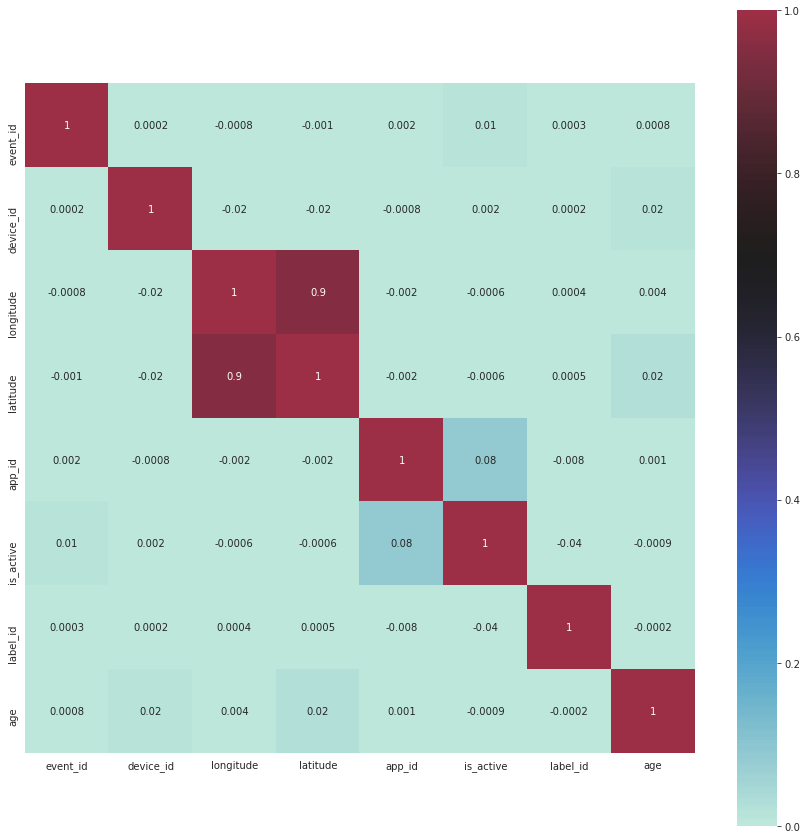

In [84]:
the_best_map(training_data.corr())